# Chapter 08 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example: kitchen gadget returns

 Implement resampling procedure and plot distribution of returns

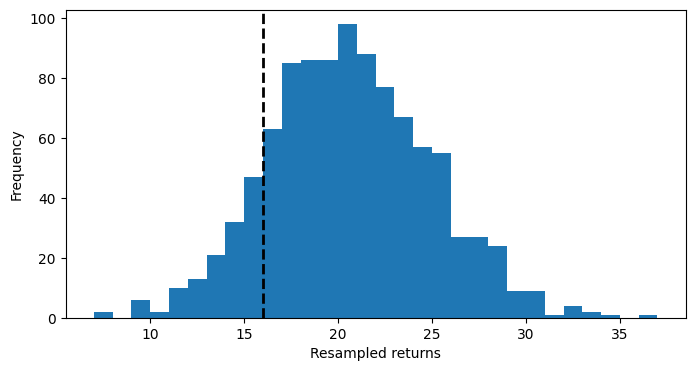

In [3]:
random.seed(123)
box = [1] + [0]*9
returns = []
for _ in range(1_000):
    draws = random.choices(box, k=200)
    returns.append(sum(draws))

fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(returns).plot.hist(bins=30, ax=ax)
ax.set_xlabel("Resampled returns")
ax.set_ylabel("Frequency")
ax.axvline(16, color="black", linestyle="dashed", linewidth=2)
plt.show()

 Calculate $p$-value

In [4]:
n_below = sum(np.array(returns) <= 16)
p_value = n_below / len(returns)
print(f"below 16 = {n_below}")
print(f"p-value = {p_value}")

below 16 = 196
p-value = 0.196


## Confidence interval

 Implement resampling procedure and plot distribution of returns

Confidence interval: [10. 23.]


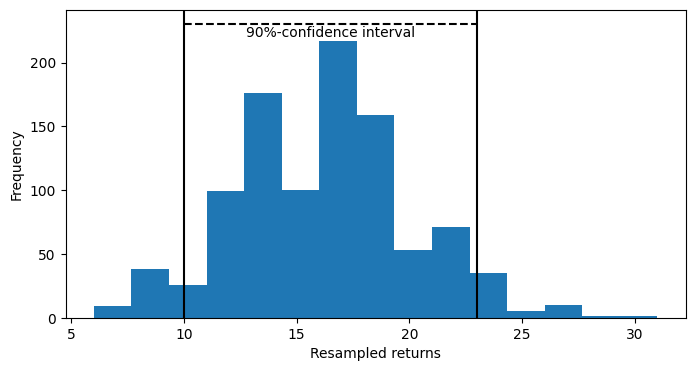

In [5]:
random.seed(123)
box = [1]*16 + [0]*184
returns = []
for _ in range(1_000):
    draws = random.choices(box, k=200)
    returns.append(sum(draws))
ci_interval = np.percentile(returns, [5, 95])
print(f"Confidence interval: {ci_interval}")

fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(returns).plot.hist(bins=15, ax=ax)
ax.set_xlabel("Resampled returns")
ax.set_ylabel("Frequency")
for ci in ci_interval:
    ax.axvline(ci, color="black")
ax.plot(ci_interval, [230, 230], color="black", linestyle="--")
ax.text(ci_interval.mean(), 220, "90%-confidence interval", ha="center")

plt.show()

 Confidence interval in percent

In [6]:
print(f"Point estimate of return rate: {16 / 200}")
print(f"Confidence interval: {ci_interval/200}")

Point estimate of return rate: 0.08
Confidence interval: [0.05  0.115]


# On-sided hypothesis test

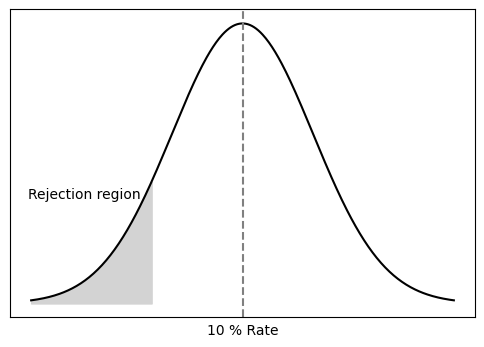

In [7]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)
p_10 = stats.norm.ppf(0.1)

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(0, c="grey", linestyle="--")

ax.fill_between(x[x<p_10], y[x<p_10], color="lightgrey")
ax.text(-2.25, 0.15, "Rejection region", horizontalalignment="center")

ax.set_xlabel("10 % Rate")
ax.set_ylabel("")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()

# Two-sided hypothesis test

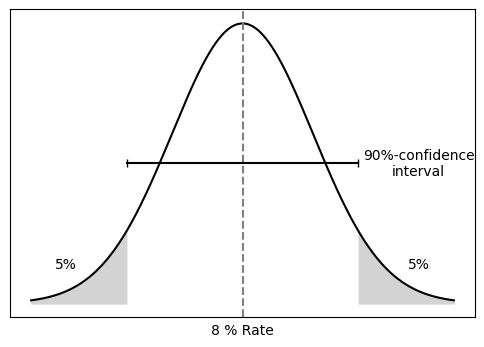

In [8]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)
ci_interval = [stats.norm.ppf(0.05), stats.norm.ppf(0.95)]

fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x, y, c="black")
ax.axvline(0, c="grey", linestyle="--")

ax.fill_between(x[x<ci_interval[0]], y[x<ci_interval[0]], color="lightgrey")
ax.fill_between(x[x>ci_interval[1]], y[x>ci_interval[1]], color="lightgrey")
ax.text(-2.5, 0.05, "5%", horizontalalignment="center")
ax.text(2.5, 0.05, "5%", horizontalalignment="center")

ax.plot(ci_interval, [0.2, 0.2], color="black", marker="|")
ax.text(2.5, 0.2, "90%-confidence\ninterval", ha="center", va="center")

ax.set_xlabel("8 % Rate")
ax.set_ylabel("")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()